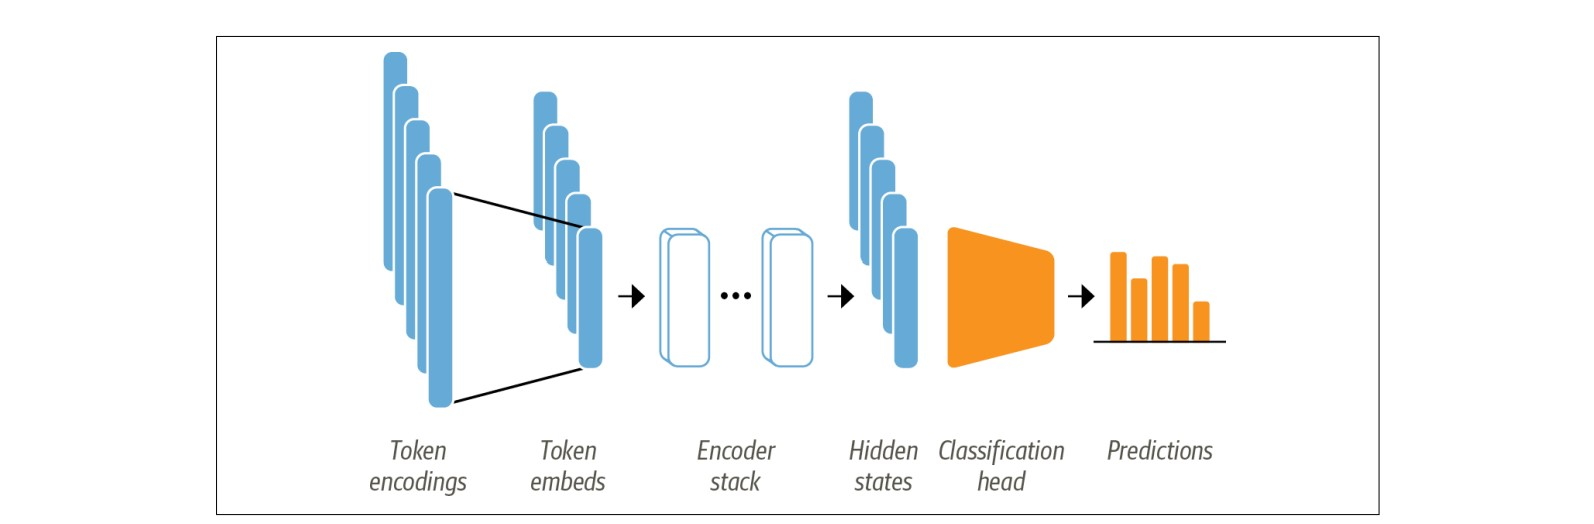

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn

In [ ]:
import pandas as pd
from datasets import list_datasets

In [ ]:

all_datasets = list_datasets()


<ipython-input-3-1a5f1b123eb1>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
all_datasets

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'nyu-mll/blimp',
 'b

In [ ]:
len(all_datasets)

100104

From the datasets available will use 'emotion' dataset from hugging face datasets.

In [ ]:
'dair-ai/emotion' in all_datasets

True

In [ ]:
from datasets import load_dataset

emotion = load_dataset('emotion')
emotion.set_format(type='pandas')

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [ ]:
#check the length of dataset
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
df = emotion['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
df.shape

(16000, 4)

In [ ]:
#Generate labels of class for the emotions
classes = emotion['train'].features['label'].names
classes

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:
# Add the label_name in the df
df['label_name'] = df['label'].apply(lambda x: classes[x])

In [ ]:

df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


#### Dataset Analysis

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['label_name'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

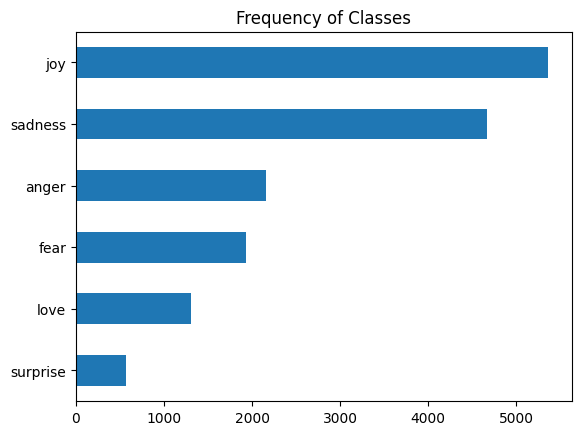

In [ ]:
# Visualize the frequency of classes
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title('Frequency of Classes')
plt.show()

Its been said that - Transformers works very well on Imbalanced dataset, Lets check for our dataset.

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

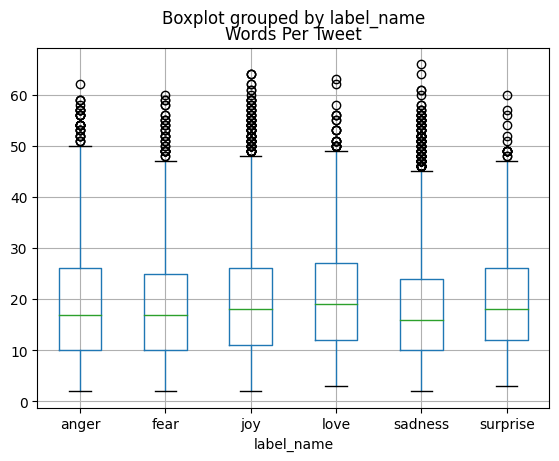

In [ ]:
df['Words Per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by='label_name')

From box plot we can say that the average number of words per tweet ranges from 15 to 19 words. and the max length of tweets can be seen upto 70.

Convert Text to Tokens:
- The transformers assumes the text has been tokenized and encoded as Numerical vectors.
- AutoTokenizer : Automatically fetch tokenization model which is used in the transformer we are using, to make sure that, we should always use the same tokenizer on which that transformer was trained.

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"    #BERT based, 512 tokens
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
# Example Usage
text = "Artificial Intelligence is a Great Technology only when used with restrictions"
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 7976, 4454, 2003, 1037, 2307, 2974, 2069, 2043, 2109, 2007, 9259, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Observe : The sentence actually has 11 words, but 13 tokens are generated. Out of these tokens the first [101] and last [102] tokens are special tokens.
- [CLS] - Classification token. Specifies satrt of sentence.
- [SEP] - Separator token

How to check exactly how the words are splitted into tokens, not necessary each single word is considered as separate token.
- We can use 'convert_ids_to_tokens' and 'convert_tokens_to_ids'

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'artificial', 'intelligence', 'is', 'a', 'great', 'technology', 'only', 'when', 'used', 'with', 'restrictions', '[SEP]']


In [ ]:
#Vocab size of tokenizer
tokenizer.vocab_size, tokenizer.model_max_length

(30522, 512)

Tokenization of Dataset

In [ ]:
#reset pandas dataframe to normal dict
emotion.reset_format()


In [44]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
# Map the data
def tokenize(batch):
  temp =tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(emotion["train"][:5]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0], [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}


In [ ]:
# create encoding for all splits
emotions_encoded = emotion.map(tokenize, batched=True, batch_size=None)

In [ ]:
emotions_encoded    #two columns are added - input_ids, 'attention_mask

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

Model Building

In [ ]:
text

'Artificial Intelligence is a Great Technology only when used with restrictions'

In [ ]:
inputs = tokenizer(text, return_tensors='pt')   #create tensors
inputs

{'input_ids': tensor([[ 101, 7976, 4454, 2003, 1037, 2307, 2974, 2069, 2043, 2109, 2007, 9259,
          102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

AutoModel :

In [ ]:
from transformers import AutoModel
import torch

model = AutoModel.from_pretrained(model_ckpt)

In [45]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#since we want the model to generate embeddings
#No Training required - no_grad
with torch.no_grad():
  outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [47]:
last_hidden_states

tensor([[[-0.1755,  0.0899, -0.0859,  ..., -0.2170,  0.2045,  0.3758],
         [-0.1088,  0.1634, -0.2983,  ..., -0.4562,  0.5162,  0.6200],
         [-0.1625, -0.0052, -0.1964,  ..., -0.7904, -0.2690,  0.0907],
         ...,
         [-0.0706,  0.3778,  0.1780,  ..., -0.3341, -0.6422,  0.0082],
         [-0.1049, -0.0640,  0.0445,  ..., -0.4299, -0.1970,  0.1439],
         [ 0.9365,  0.1850, -0.2987,  ...,  0.0621, -0.5441, -0.1989]]])

In [ ]:
last_hidden_states.shape

torch.Size([1, 13, 768])

### Fine-Tuning Transformers

Classification Head:
- Techniques for Fine Tuning:
1. Transfer Learning : Attach classification head directly to Model hidden state and retrain the model
2. Pass the hidden_state_outputs to next model directly without retraining.

- AutoModelForSequenceClassification model has a classification head on top of the pretrained model outputs
- The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach.
- The only slight modification is that we use the AutoModelForSequenceClassification model instead of AutoModel.
- The difference is that the AutoModelForSequenceClassification model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model.

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

device

device(type='cuda')

In [ ]:

from transformers import TrainingArguments

In [ ]:
batch_size = 64
model_name = "distilbert-finetuned-emotion"

training_args = TrainingArguments(output_dir = model_name,
                                 num_train_epochs=10,
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size= batch_size,
                                 per_device_eval_batch_size = batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy = 'epoch',
                                  disable_tqdm=False)

Evaluation Metrics

In [ ]:

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [ ]:
# Model Trainer
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.287349,0.906000,0.906000
2,0.527100,0.174447,0.934000,0.934635
3,0.527100,0.164776,0.939000,0.939358
4,0.119800,0.155230,0.938500,0.938149
5,0.119800,0.158767,0.937000,0.937481
6,0.076300,0.159417,0.938000,0.938008
7,0.076300,0.175215,0.933500,0.933648
8,0.055100,0.178501,0.941500,0.941757
9,0.055100,0.184040,0.940000,0.940390
10,0.037800,0.184307,0.938500,0.938535


Checkpoint destination directory distilbert-finetuned-emotion/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-finetuned-emotion/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-finetuned-emotion/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-finetuned-emotion/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory distilbert-finetuned-emotion/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=2500, training_loss=0.16324464721679688, metrics={'train_runtime': 1141.1005, 'train_samples_per_second': 140.216, 'train_steps_per_second': 2.191, 'total_flos': 3601714308480000.0, 'train_loss': 0.16324464721679688, 'epoch': 10.0})

Predictions

In [ ]:
preds_outputs = trainer.predict(emotions_encoded['test'])
preds_outputs.metrics

{'test_loss': 0.21797537803649902,
 'test_accuracy': 0.9215,
 'test_f1': 0.9213979687215679,
 'test_runtime': 3.427,
 'test_samples_per_second': 583.599,
 'test_steps_per_second': 9.338}

In [ ]:
import numpy as np
y_preds = np.argmax(preds_outputs.predictions, axis=1)
y_true = emotions_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true, y_preds))

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       581
           1       0.95      0.94      0.95       695
           2       0.82      0.84      0.83       159
           3       0.91      0.91      0.91       275
           4       0.87      0.90      0.88       224
           5       0.76      0.68      0.72        66

    accuracy                           0.92      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
label_counts

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

In [ ]:
#Predict on any other sentence
text = 'i want to kill you'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]

(3, 'anger')

In [ ]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.2847, -0.3910, -1.4847,  4.8546, -0.4940, -3.3912]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [1]:
# you can now zip the model and use it for other task